# Plotting results from preliminary MOE routing analysis
_Created on 10/22/2025_


In [1]:
import jax
import jax.numpy as jnp
import flax
from flax import nnx
from flax.nnx.nn import initializers
import optax
from typing import Callable
from tqdm import tqdm
from datetime import date


import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial
from collections import defaultdict
import os
import pickle

from models import TridentMOELayer
from utils import trident

%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = "/Volumes/export/isn/vikrant/Data/trident/playground/data"
FIG_PATH = "/Volumes/export/isn/vikrant/github/trident_playground/figures"

In [5]:
# load the data
routing_df = pd.DataFrame(pd.read_pickle(os.path.join(DATA_PATH, "routing_sparsity_n0.10_r10_2025-10-22.pkl")))

routing_df

,threshold,accuracy,loss,resample
0,0.000100,1.000,0.000398,0
1,0.000162,1.000,0.000243,0
2,0.000264,1.000,0.000193,0
3,0.000428,1.000,0.001008,0
4,0.000695,1.000,0.000120,0
...,...,...,...,...
195,0.143845,0.080,2.302584,9
196,0.233572,0.142,2.302584,9
197,0.379269,0.200,2.302584,9
198,0.615848,0.200,2.302584,9


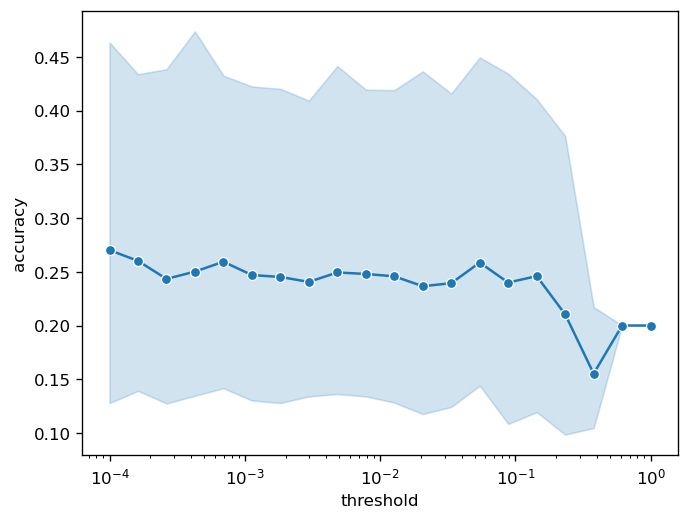

In [4]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(data=routing_df, x="threshold", y="accuracy", marker='o', ax=ax)
ax.set_xscale('log')